In [1]:
# Read the data from excel file
import pandas as pd
dataset = pd.read_excel(r'C:\My Downloads\ML_Dataset\EnergyManagementDataset.xlsx', sheet_name = 'Logbook15Minutes',\
                        header = 7,  usecols = 'A:K', nrows = 2783) 
print (dataset.shape)
print (dataset.columns.tolist())
print (dataset.head())

(2783, 11)
['Log Date / Time', '132KV INCOMER', 'BUS CAPACITOR 1600LVAR', 'RMBH O/G-1', 'CCR O/G-1', 'CMBH O/G-1', 'BUS CAPACITOR-2 (3300kVAR)', 'RMBH O/G-2', 'CGR O/G-2', 'CMBH O/G-2', '132KV INCOMER [ kVAh ]']
                       Log Date / Time  132KV INCOMER  BUS CAPACITOR 1600LVAR  \
0  01-04-2019 00:00 - 01-04-2019 00:15        5701.63                       0   
1  01-04-2019 00:15 - 01-04-2019 00:30        5242.88                       0   
2  01-04-2019 00:30 - 01-04-2019 00:45        5996.54                       0   
3  01-04-2019 00:45 - 01-04-2019 01:00        5636.10                       0   
4  01-04-2019 01:00 - 01-04-2019 01:15        5636.10                       0   

   RMBH O/G-1  CCR O/G-1  CMBH O/G-1  BUS CAPACITOR-2 (3300kVAR)  RMBH O/G-2  \
0     1899.97     800.00     1499.90                           0      300.03   
1     1800.00     700.03     1300.10                           0      200.19   
2     2000.00     800.00     1399.94                         

In [2]:
%matplotlib inline

In [3]:
# Find the null value
dataset.isnull().sum()

Log Date / Time               0
132KV INCOMER                 0
BUS CAPACITOR 1600LVAR        0
RMBH O/G-1                    0
CCR O/G-1                     0
CMBH O/G-1                    0
BUS CAPACITOR-2 (3300kVAR)    0
RMBH O/G-2                    0
CGR O/G-2                     0
CMBH O/G-2                    0
132KV INCOMER [ kVAh ]        0
dtype: int64

In [4]:
energy = dataset.copy()
energy_prep = energy.drop(['Log Date / Time'], axis =1)
print (energy_prep)

      132KV INCOMER  BUS CAPACITOR 1600LVAR  RMBH O/G-1  CCR O/G-1  \
0           5701.63                       0     1899.97     800.00   
1           5242.88                       0     1800.00     700.03   
2           5996.54                       0     2000.00     800.00   
3           5636.10                       0     1900.03     699.90   
4           5636.10                       0     1899.97     700.03   
...             ...                     ...         ...        ...   
2778        5799.94                       0     1899.97     800.00   
2779        5439.49                       0     1800.00     800.00   
2780        5865.47                       0     1800.00     800.00   
2781        6291.46                       0     2100.03     899.84   
2782        4194.30                       0     1699.97     700.16   

      CMBH O/G-1  BUS CAPACITOR-2 (3300kVAR)  RMBH O/G-2  CGR O/G-2  \
0        1499.90                           0      300.03     500.00   
1        1300.10 

In [5]:
columns = energy_prep.columns.tolist()
print (columns)
energy_prep['132KV INCOMER'].dtype
energy_prep.dtypes
energy_prep['CCR O/G-1'].mean()

['132KV INCOMER', 'BUS CAPACITOR 1600LVAR', 'RMBH O/G-1', 'CCR O/G-1', 'CMBH O/G-1', 'BUS CAPACITOR-2 (3300kVAR)', 'RMBH O/G-2', 'CGR O/G-2', 'CMBH O/G-2', '132KV INCOMER [ kVAh ]']


661.0849910168853

In [6]:
energy[columns[0]]
len(energy)


2783

In [7]:
cols = []
for i in range (0, len(columns)):
    if energy[columns[i]].dtype is int or float:
        if energy[columns[i]].mean() == 0.0:
            cols.append(columns[i])
         
energy_prep1 = energy.drop(cols, axis=1)
print (energy_prep1)

                          Log Date / Time  132KV INCOMER  RMBH O/G-1  \
0     01-04-2019 00:00 - 01-04-2019 00:15        5701.63     1899.97   
1     01-04-2019 00:15 - 01-04-2019 00:30        5242.88     1800.00   
2     01-04-2019 00:30 - 01-04-2019 00:45        5996.54     2000.00   
3     01-04-2019 00:45 - 01-04-2019 01:00        5636.10     1900.03   
4     01-04-2019 01:00 - 01-04-2019 01:15        5636.10     1899.97   
...                                   ...            ...         ...   
2778  29-04-2019 22:30 - 29-04-2019 22:45        5799.94     1899.97   
2779  29-04-2019 22:45 - 29-04-2019 23:00        5439.49     1800.00   
2780  29-04-2019 23:00 - 29-04-2019 23:15        5865.47     1800.00   
2781  29-04-2019 23:15 - 29-04-2019 23:30        6291.46     2100.03   
2782  29-04-2019 23:30 - 29-04-2019 23:45        4194.30     1699.97   

      CCR O/G-1  CMBH O/G-1  RMBH O/G-2  CGR O/G-2  CMBH O/G-2  \
0        800.00     1499.90      300.03     500.00      800.00   
1  

In [126]:
# drop the time column
energy_prep2 = energy_prep1.iloc[:, 1:]
energy_prep3 = energy_prep2.copy()
energy_prep2['RMBH O/G-1'][2239] = energy_prep2['RMBH O/G-1'].mean()
print (energy_prep2['RMBH O/G-1'][2239])

2982.213517786543


In [127]:
# Find out the correlation
correlation = energy_prep2.corr()
print (correlation)

                        132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  \
132KV INCOMER                1.000000    0.722716   0.676371    0.658937   
RMBH O/G-1                   0.722716    1.000000   0.716513    0.028812   
CCR O/G-1                    0.676371    0.716513   1.000000    0.007511   
CMBH O/G-1                   0.658937    0.028812   0.007511    1.000000   
RMBH O/G-2                   0.585752    0.555618   0.825444    0.035751   
CGR O/G-2                    0.687995    0.720625   0.950794    0.030127   
CMBH O/G-2                   0.703132    0.095799   0.104714    0.924479   
132KV INCOMER [ kVAh ]       0.999888    0.723339   0.677199    0.657918   

                        RMBH O/G-2  CGR O/G-2  CMBH O/G-2  \
132KV INCOMER             0.585752   0.687995    0.703132   
RMBH O/G-1                0.555618   0.720625    0.095799   
CCR O/G-1                 0.825444   0.950794    0.104714   
CMBH O/G-1                0.035751   0.030127    0.924479   
RMBH O/G-2

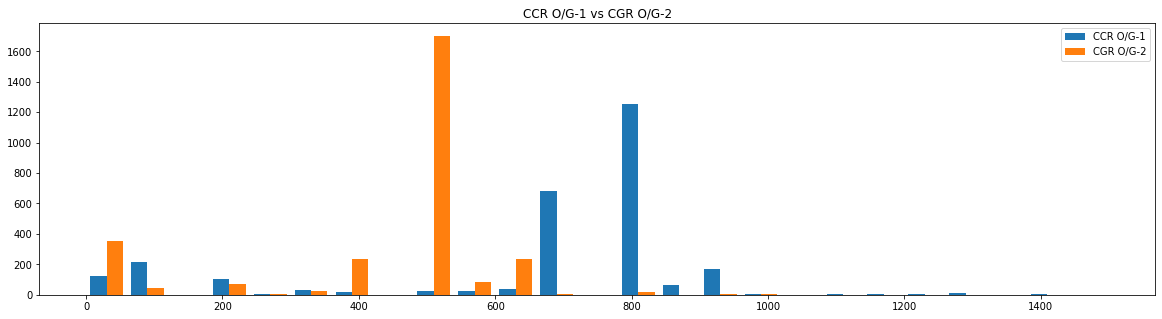

In [10]:
# plot the graph to visualize correlation
import matplotlib.pyplot as plt
X = dataset['CCR O/G-1'].values
Y = dataset['CGR O/G-2'].values

x = dataset['CMBH O/G-1'].values
y = dataset['CMBH O/G-2'].values

plt.figure(figsize = (20, 5))
plt.hist([X, Y], bins = 25, label = ['CCR O/G-1','CGR O/G-2' ])
plt.title('CCR O/G-1 vs CGR O/G-2')
plt.legend()
plt.savefig('CCR O_G-1 vs CGR O_G-2.pdf')
plt.show()



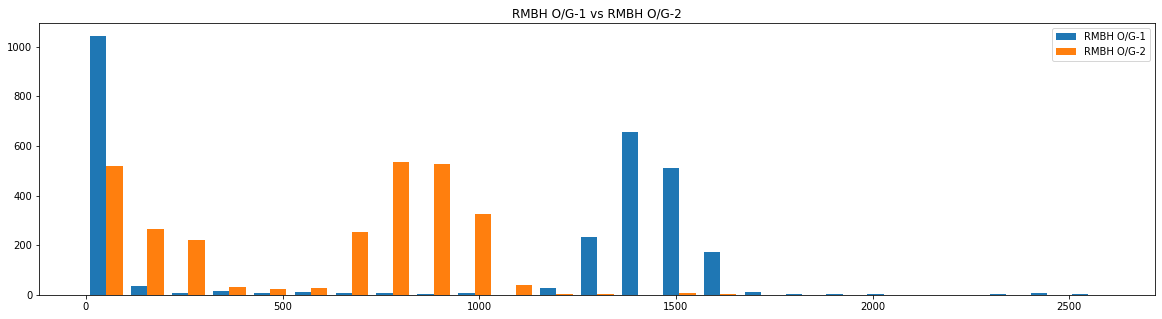

In [11]:
plt.figure(figsize = (20, 5))
plt.hist([x, y], bins = 25, label = ['RMBH O/G-1', 'RMBH O/G-2' ])
plt.title('RMBH O/G-1 vs RMBH O/G-2')
plt.legend()
plt.savefig('RMBH O_G-1 vs RMBH O_G-2.pdf')
plt.show()

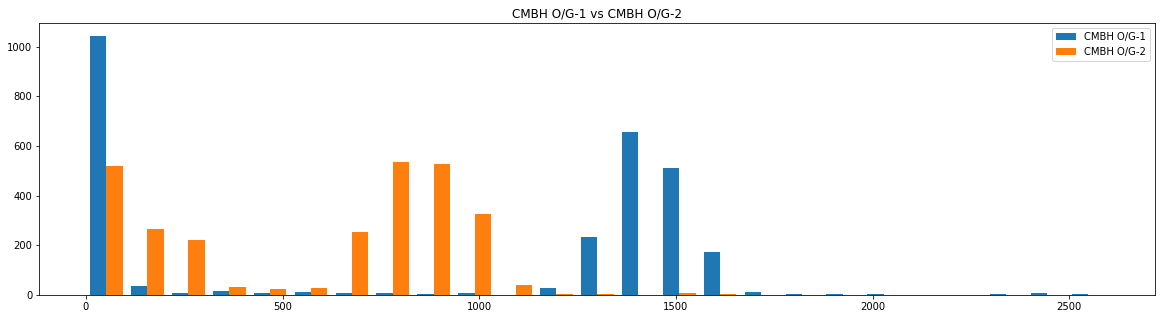

In [12]:
plt.figure(figsize = (20, 5))
plt.hist([x, y], bins = 25, label = ['CMBH O/G-1', 'CMBH O/G-2' ])
plt.title('CMBH O/G-1 vs CMBH O/G-2')
plt.legend()
plt.savefig('CMBH O_G-1 vs CMBH O_G-2.pdf')
plt.show()

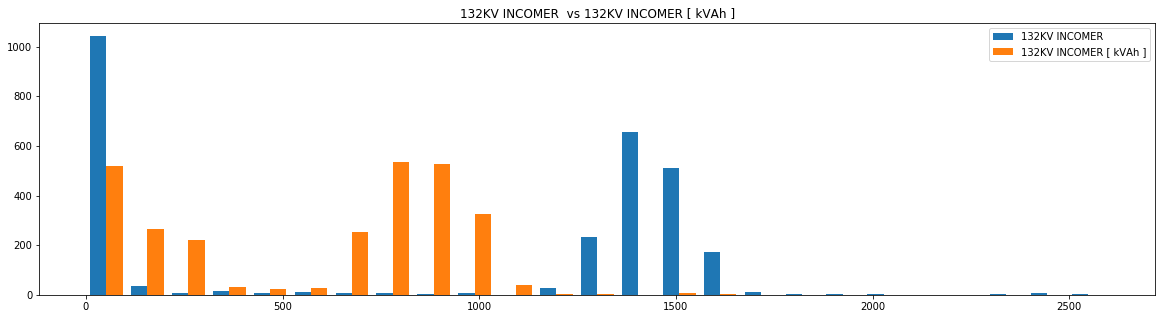

In [13]:
X = dataset['132KV INCOMER'].values
Y = dataset['132KV INCOMER [ kVAh ]'].values

plt.figure(figsize = (20, 5))
plt.hist([x, y], bins = 25, label = ['132KV INCOMER ', '132KV INCOMER [ kVAh ]'])
plt.title('132KV INCOMER  vs 132KV INCOMER [ kVAh ]')
plt.legend()
plt.savefig('132KV INCOMER  vs 132KV INCOMER [ kVAh ].pdf')
plt.show()

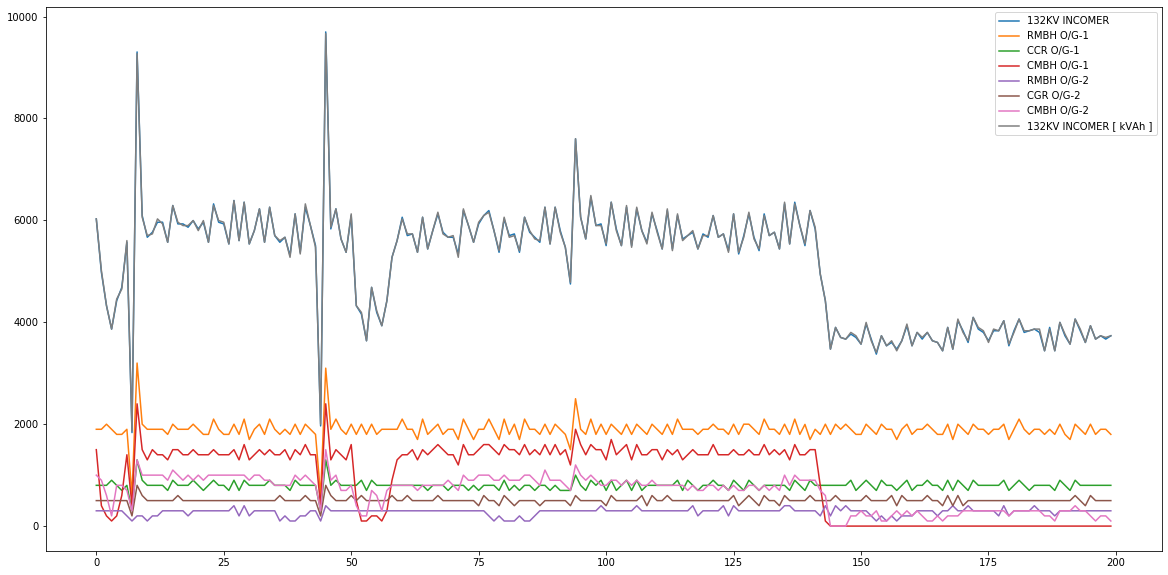

In [105]:
energy_prep4 = energy_prep3[2100:2300]
energy_prep4['RMBH O/G-1'][2239] = energy_prep4['RMBH O/G-1'].mean()
size = energy_prep4.shape[0] 
plt.figure(figsize = (20, 10))
for col in energy_prep4.columns.to_list():
    plt.plot(range(0, size), energy_prep4[col].values, label = col)
plt.legend()
plt.show()

In [128]:
# Normalize the data
features = energy_prep2.columns.tolist()
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
energy_prep2[features] = scale.fit_transform(energy_prep2[features])
print (energy_prep2)

      132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  RMBH O/G-2  CGR O/G-2  \
0          0.819318    0.465061   0.518639    0.894904    0.523841   0.394318   
1          0.533279    0.328725   0.145401    0.610497   -0.291192  -0.142045   
2          1.003199    0.601479   0.518639    0.752615    1.338874   0.394318   
3          0.778458    0.465143   0.144916    0.895089    0.523841   0.394318   
4          0.778458    0.465061   0.145401    0.610312    0.523841   0.394318   
...             ...         ...        ...         ...         ...        ...   
2778       0.880615    0.465061   0.518639    0.752786    0.523596   0.394157   
2779       0.655869    0.328725   0.518639    0.610312    0.523596   0.394854   
2780       0.921475    0.328725   0.518639    0.752786    0.523596   0.394157   
2781       1.187086    0.737897   0.891392    0.894904    1.339935   0.394157   
2782      -0.120528    0.192307   0.145887   -0.813062   -0.292743   0.394157   

      CMBH O/G-2  132KV INC

2783


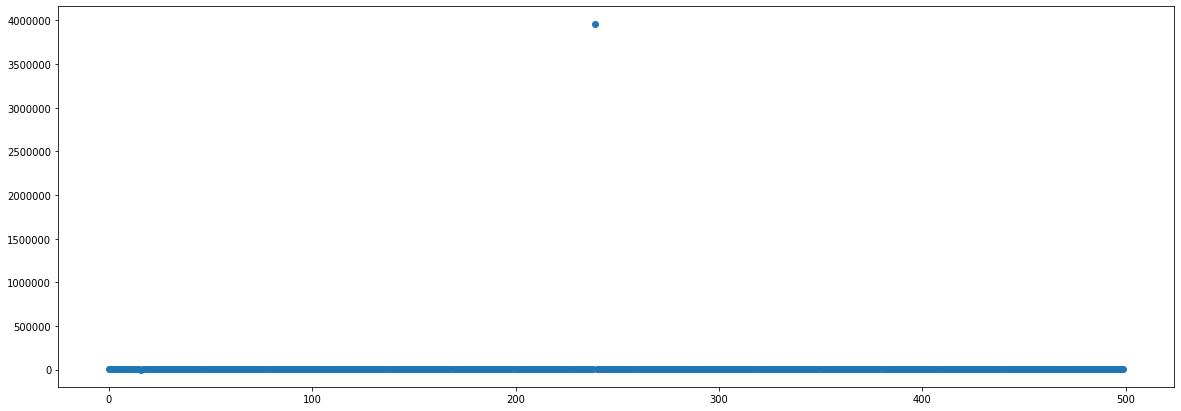

In [85]:
print (dataset.shape[0])
plt.figure(figsize = (20, 7))
plt.scatter(range(0, 500), dataset['RMBH O/G-1'][2000:2500].values)
plt.show()

In [102]:
dataset[dataset['RMBH O/G-1']> 5000]
# 'RMBH O/G-1' feature has abnormally high value in row: 2239

,Log Date / Time,132KV INCOMER,BUS CAPACITOR 1600LVAR,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,BUS CAPACITOR-2 (3300kVAR),RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ]
2239,24-04-2019 07:45 - 24-04-2019 08:00,5505.02,0,3963899.97,700.16,1400.06,0,300.0,499.97,899.97,5537.79


In [129]:
# find out the correlation
correlation = energy_prep2.corr()
print (correlation)

                        132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  \
132KV INCOMER                1.000000    0.722716   0.676371    0.658937   
RMBH O/G-1                   0.722716    1.000000   0.716513    0.028812   
CCR O/G-1                    0.676371    0.716513   1.000000    0.007511   
CMBH O/G-1                   0.658937    0.028812   0.007511    1.000000   
RMBH O/G-2                   0.585752    0.555618   0.825444    0.035751   
CGR O/G-2                    0.687995    0.720625   0.950794    0.030127   
CMBH O/G-2                   0.703132    0.095799   0.104714    0.924479   
132KV INCOMER [ kVAh ]       0.999888    0.723339   0.677199    0.657918   

                        RMBH O/G-2  CGR O/G-2  CMBH O/G-2  \
132KV INCOMER             0.585752   0.687995    0.703132   
RMBH O/G-1                0.555618   0.720625    0.095799   
CCR O/G-1                 0.825444   0.950794    0.104714   
CMBH O/G-1                0.035751   0.030127    0.924479   
RMBH O/G-2

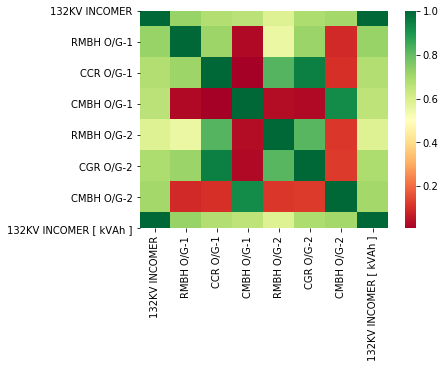

In [130]:
# plot heatmap of correlation
import seaborn as sns
plt.figure()
sns.heatmap(correlation, square = True, cmap = 'RdYlGn')
plt.savefig('Correlation.pdf', bbox_inches = 'tight')
plt.show()

In [131]:
energy_prep5 = energy_prep2.drop(['132KV INCOMER'], axis = 1)
energy_prep5


,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ]
0,0.465061,0.518639,0.894904,0.523841,0.394318,0.568179,0.797112
1,0.328725,0.145401,0.610497,-0.291192,-0.142045,0.568179,0.531481
2,0.601479,0.518639,0.752615,1.338874,0.394318,0.568179,1.001446
3,0.465143,0.144916,0.895089,0.523841,0.394318,0.568179,0.776684
4,0.465061,0.145401,0.610312,0.523841,0.394318,0.568179,0.797112
...,...,...,...,...,...,...,...
2778,0.465061,0.518639,0.752786,0.523596,0.394157,0.568179,0.878851
2779,0.328725,0.518639,0.610312,0.523596,0.394854,0.568179,0.654082
2780,0.328725,0.518639,0.752786,0.523596,0.394157,1.114779,0.919714
2781,0.737897,0.891392,0.894904,1.339935,0.394157,1.114779,1.205779


In [132]:
#create X & Y
X = energy_prep5.iloc[:, :-1]
Y = energy_prep5.iloc[:, -1]


In [133]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 1234)

In [136]:
# train the model using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
# find the coeffeicent and intercept
coeff = lr.coef_
intercept = lr.intercept_
print(coeff)
print(intercept)

[0.45366967 0.18281423 0.44279399 0.06507854 0.09583611 0.2105949 ]
-0.0006210021736124836


In [138]:
# Predict the Y
Y_predict = lr.predict(X_test)

In [139]:
# evaluate the model
score = lr.score(X_test, Y_test)
print (score)

0.9961089294315018


In [140]:
score1 = lr.score(X_train, Y_train)
print (score1)

0.9957377619616287


In [141]:
# Find out the R-squared error
from sklearn.metrics import mean_squared_error
import math
error = math.sqrt(mean_squared_error(Y_test, Y_predict))
print (error)

0.06030988839347983


In [142]:
test_size = Y_test.shape[0]
test_size

557

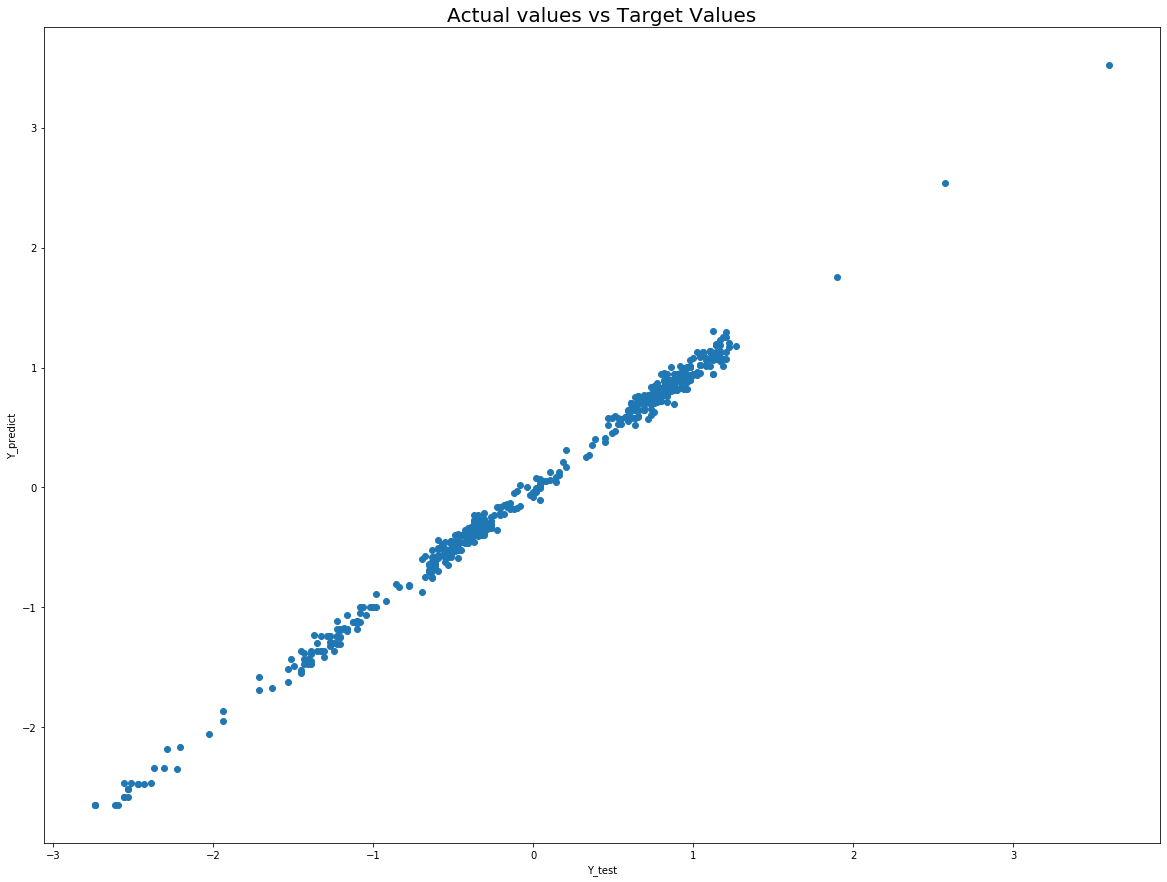

In [143]:
# plot the graph of Y_test & Y_predict
Xtest = Y_test.tolist()
Ytest = Y_predict.tolist()
plt.figure(figsize= (20, 15))
plt.title('Actual values vs Target Values', fontsize = 20)
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.scatter(Xtest, Ytest)
plt.savefig('Actual values vs Target Values_2.pdf')
plt.show()

In [25]:
Y_test.shape

(557,)

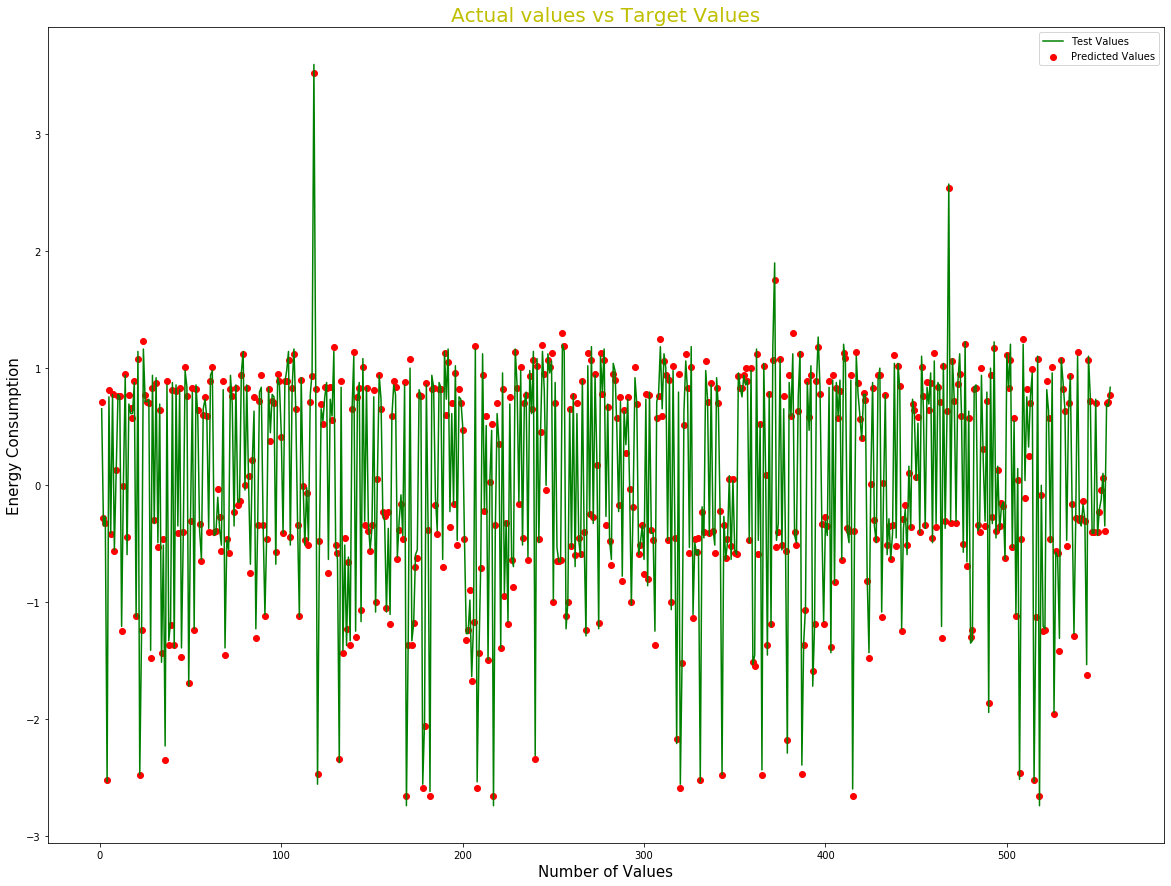

In [144]:
# plot the graph of Y_test & Y_predict
Xtest = Y_test.tolist()
Ytest = Y_predict.tolist()
plt.figure(figsize= (20, 15))
plt.title('Actual values vs Target Values', fontsize = 20, c = 'y')
plt.xlabel('Number of Values',fontsize = 15)
plt.ylabel('Energy Consumption', fontsize = 15)
plt.plot(range(1, 558), Xtest, label = 'Test Values', c = 'g')
plt.scatter(range(1, 558), Ytest, label = 'Predicted Values', c = 'r')
plt.legend()
plt.savefig('Actual values vs Target Values.pdf')
plt.show()

In [145]:
# Compare values of Y_test & Y_predict
Ytest = pd.Series(Y_test.tolist())
Ypredict = pd.Series(Y_predict.tolist())
compare_table = pd.concat([Ytest, Ypredict], axis =1)
print (compare_table)
compare_table.rename(columns = {0 :'Actual Values', 1: 'Predicted values'})

            0         1
0    0.654082  0.709202
1   -0.347152 -0.278382
2   -0.265420 -0.323050
3   -2.533525 -2.514482
4    0.756249  0.815015
..        ...       ...
552  0.102379  0.058872
553 -0.347152 -0.393493
554  0.694945  0.704290
555  0.674517  0.714965
556  0.837981  0.772277

[557 rows x 2 columns]


,Actual Values,Predicted values
0,0.654082,0.709202
1,-0.347152,-0.278382
2,-0.265420,-0.323050
3,-2.533525,-2.514482
4,0.756249,0.815015
...,...,...
552,0.102379,0.058872
553,-0.347152,-0.393493
554,0.694945,0.704290
555,0.674517,0.714965


In [28]:
energy_prep3 = energy_prep1.iloc[:, 1:]
energy_prep4 = energy_prep3.iloc[:, :-1]
first_row = energy_prep4.iloc[0, :]
print (first_row.tolist())

[5701.63, 1899.97, 800.0, 1499.9, 300.03, 500.0, 800.0]


In [29]:
# Sum of all data in the list
Total = 0
for ele in first_row.tolist():
    Total+= ele
print (Total)    
print (energy_prep3.iloc[0, -1 ])

11501.53
5668.86


energy1 = energy_prep4.head(10)
print (energy1)

In [30]:
energy1 = energy_prep4.head(10) 
energy2 = energy_prep3.iloc[0:10, -1 ].tolist()
print (energy1.shape)
print (energy2)

(10, 7)
[5668.86, 5242.88, 5996.54, 5636.1, 5668.86, 5537.79, 5111.81, 5963.78, 5701.63, 5701.63]


In [31]:
total_energy = 0
Total_energy_List = []
for i in range(0, 10):
    e = energy1.loc[i].tolist()
    for ele in e:
        total_energy+= ele
    Total_energy_List.append(total_energy)
Total_energy_List1 = ['%.2f' %member for member in Total_energy_List]
Total_energy_List2 = []
for member in Total_energy_List1:
    Total_energy_List2.append(float(member))
print (Total_energy_List2)

[11501.53, 21944.73, 33841.08, 45177.17, 56313.27, 67583.95, 77662.99, 89526.7, 100928.39, 112430.08]


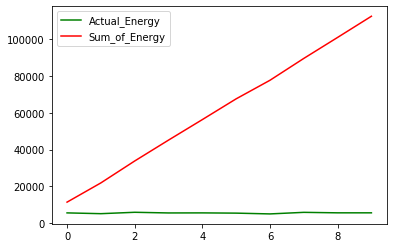

In [32]:
X = range(0,10)
plt.figure()
plt.plot(X, energy2, label = 'Actual_Energy', c = 'green')
plt.plot(X, Total_energy_List2, label = 'Sum_of_Energy', c = 'red')
plt.legend()
plt.show()

In [33]:
predict_energy = lr.predict(energy1)
print (predict_energy)
predict_energy1 = ['%.2f' % element for element in predict_energy]
predict_energy2 = []
for member in predict_energy1:
    predict_energy2.append(float(member))
print (predict_energy2)

[5697.39910571 5239.32503974 5992.51133246 5631.89021659 5632.48443795
 5566.69648701 5075.62271373 5959.44374204 5697.38480994 5697.01498277]
[5697.4, 5239.33, 5992.51, 5631.89, 5632.48, 5566.7, 5075.62, 5959.44, 5697.38, 5697.01]


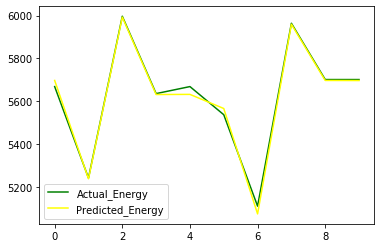

In [34]:
X = range(0,10)
plt.figure()
plt.plot(X, energy2, label = 'Actual_Energy', c = 'green')
plt.plot(X, predict_energy2, label = 'Predicted_Energy', c = 'yellow')
plt.legend()
plt.savefig('Actual vs Predicted Energy_small_plot.pdf')
plt.show()

In [35]:
# Working on Date/time columns
# Datatype of Date/time column
d = dataset['Log Date / Time'][0]
print (d)
print (type(d))

01-04-2019 00:00 - 01-04-2019 00:15
<class 'str'>


In [36]:
date = []
for i in range (0, len(dataset['Log Date / Time'])):
    d = dataset['Log Date / Time'][i]
    dsplit = d.split('-')
    m = dsplit[0]
    date.append(int(m))

In [37]:
date_df = pd.DataFrame(date)
energy_per_day = pd.concat([date_df, energy_prep3], axis = 1)
energy_per_days = energy_per_day.rename(columns = {0: 'Date'})   
print (energy_per_days)

      Date  132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  RMBH O/G-2  \
0        1        5701.63     1899.97     800.00     1499.90      300.03   
1        1        5242.88     1800.00     700.03     1300.10      200.19   
2        1        5996.54     2000.00     800.00     1399.94      399.87   
3        1        5636.10     1900.03     699.90     1500.03      300.03   
4        1        5636.10     1899.97     700.03     1299.97      300.03   
...    ...            ...         ...        ...         ...         ...   
2778    29        5799.94     1899.97     800.00     1400.06      300.00   
2779    29        5439.49     1800.00     800.00     1299.97      300.00   
2780    29        5865.47     1800.00     800.00     1400.06      300.00   
2781    29        6291.46     2100.03     899.84     1499.90      400.00   
2782    29        4194.30     1699.97     700.16      300.03      200.00   

      CGR O/G-2  CMBH O/G-2  132KV INCOMER [ kVAh ]  
0        500.00      800.00      

In [38]:
print (energy_per_days['Date'].unique())
print (energy_per_days.groupby('Date').Date.count())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
Date
1     96
2     96
3     96
4     96
5     96
6     96
7     96
8     96
9     96
10    96
11    96
12    96
13    96
14    96
15    96
16    96
17    96
18    96
19    96
20    96
21    96
22    96
23    96
24    96
25    96
26    96
27    96
28    96
29    95
Name: Date, dtype: int64


In [39]:
energy_per_day1 = energy_per_days.iloc[0:96, :]
print (energy_per_day1)

    Date  132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  RMBH O/G-2  \
0      1        5701.63     1899.97     800.00     1499.90      300.03   
1      1        5242.88     1800.00     700.03     1300.10      200.19   
2      1        5996.54     2000.00     800.00     1399.94      399.87   
3      1        5636.10     1900.03     699.90     1500.03      300.03   
4      1        5636.10     1899.97     700.03     1299.97      300.03   
..   ...            ...         ...        ...         ...         ...   
91     1        4128.77      499.97     800.00     1500.03       99.84   
92     1        3702.78        0.00     700.03     1399.94      200.19   
93     1        3833.86      200.00     700.03     1500.03       99.84   
94     1        5373.95     1600.00     800.00     1399.94      300.03   
95     1        5308.42     1700.03     700.03     1400.06      300.03   

    CGR O/G-2  CMBH O/G-2  132KV INCOMER [ kVAh ]  
0       500.0       800.0                 5668.86  
1      

In [40]:
energy_per_day2 = energy_per_days.iloc[96:192, :]
print (energy_per_day2)

     Date  132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  RMBH O/G-2  \
96      2        5636.10     1899.97     699.90     1500.03      300.03   
97      2        2719.74      900.03     300.03      699.90      100.10   
98      2        7569.41     2499.97    1000.06     2000.00      399.87   
99      2           0.00        0.00       0.00        0.00        0.00   
100     2           0.00        0.00       0.00        0.00        0.00   
..    ...            ...         ...        ...         ...         ...   
187     2        3112.96      200.00     199.94     1600.00        0.00   
188     2        3964.93     1400.00     200.06     1299.97        0.00   
189     2        4915.20     2000.00     199.94     1600.00        0.00   
190     2        4554.75     1800.00     300.03     1500.03        0.00   
191     2        4227.07     1600.00     199.94     1299.97        0.00   

     CGR O/G-2  CMBH O/G-2  132KV INCOMER [ kVAh ]  
96       400.0      800.00                 566

In [41]:
energy_per_day3 = energy_per_days.iloc[192:288, :]
print (energy_per_day3)

     Date  132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  RMBH O/G-2  \
192     3        4489.22     1800.00     200.06     1400.06        0.00   
193     3        4718.59     1899.97     199.94     1500.03       99.84   
194     3        4194.30     1700.03     300.03     1399.94        0.00   
195     3        4784.13     1899.97     200.06     1500.03      100.10   
196     3        4227.07     1600.00     199.94     1399.94        0.00   
..    ...            ...         ...        ...         ...         ...   
283     3        2588.67        0.00      99.97     1600.00        0.00   
284     3        1769.47        0.00       0.00      999.94        0.00   
285     3        2949.12        0.00     100.10     1800.06        0.00   
286     3        2457.60        0.00      99.97     1500.03        0.00   
287     3        2588.67        0.00      99.97     1499.90        0.00   

     CGR O/G-2  CMBH O/G-2  132KV INCOMER [ kVAh ]  
192      100.0      800.00                 445

In [42]:
energy_per_day4 = energy_per_days[energy_per_days['Date'] == 4]
print (energy_per_day4)

     Date  132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  RMBH O/G-2  \
288     4        2424.83         0.0      99.97     1500.03         0.0   
289     4        2326.53         0.0     100.10     1400.06         0.0   
290     4        2588.67         0.0      99.97     1499.90         0.0   
291     4        2359.30         0.0      99.97     1400.06         0.0   
292     4        2260.99         0.0      99.97     1399.94         0.0   
..    ...            ...         ...        ...         ...         ...   
379     4        2195.46         0.0       0.00     1400.06         0.0   
380     4        2392.06         0.0       0.00     1500.03         0.0   
381     4        2260.99         0.0       0.00     1399.94         0.0   
382     4        2228.22         0.0       0.00     1400.06         0.0   
383     4        2293.76         0.0       0.00     1399.94         0.0   

     CGR O/G-2  CMBH O/G-2  132KV INCOMER [ kVAh ]  
288        0.0      699.97                 242

In [43]:
# Create a dictionary to store each day data separately
per_day = {}
for i in range(0,30):
    k = 'energy_per_day' + str(i)
    per_day.update({k:[]})
#print (per_day)
key = list(per_day.keys())
print (key[0])

energy_per_day0


In [44]:
# Store each day in dictionary 
for i in range(1,30): 
    per_day[key[i]].append(energy_per_days[energy_per_days['Date'] == i])
    

In [45]:
print (per_day)

{'energy_per_day0': [], 'energy_per_day1': [    Date  132KV INCOMER  RMBH O/G-1  CCR O/G-1  CMBH O/G-1  RMBH O/G-2  \
0      1        5701.63     1899.97     800.00     1499.90      300.03   
1      1        5242.88     1800.00     700.03     1300.10      200.19   
2      1        5996.54     2000.00     800.00     1399.94      399.87   
3      1        5636.10     1900.03     699.90     1500.03      300.03   
4      1        5636.10     1899.97     700.03     1299.97      300.03   
..   ...            ...         ...        ...         ...         ...   
91     1        4128.77      499.97     800.00     1500.03       99.84   
92     1        3702.78        0.00     700.03     1399.94      200.19   
93     1        3833.86      200.00     700.03     1500.03       99.84   
94     1        5373.95     1600.00     800.00     1399.94      300.03   
95     1        5308.42     1700.03     700.03     1400.06      300.03   

    CGR O/G-2  CMBH O/G-2  132KV INCOMER [ kVAh ]  
0       500.0  

In [46]:
day1 = per_day[key[1]]
day1_df = pd.DataFrame(day1)
print (day1_df.columns)

RangeIndex(start=0, stop=1, step=1)


In [47]:
day1 = per_day['energy_per_day1']
day1_df = pd.DataFrame(day1[0])
data1 = day1_df['RMBH O/G-1']
data2 = day1_df['CMBH O/G-1']
data3 = day1_df['RMBH O/G-2']
data4 = day1_df['CGR O/G-2']
data5 = day1_df['CMBH O/G-2']


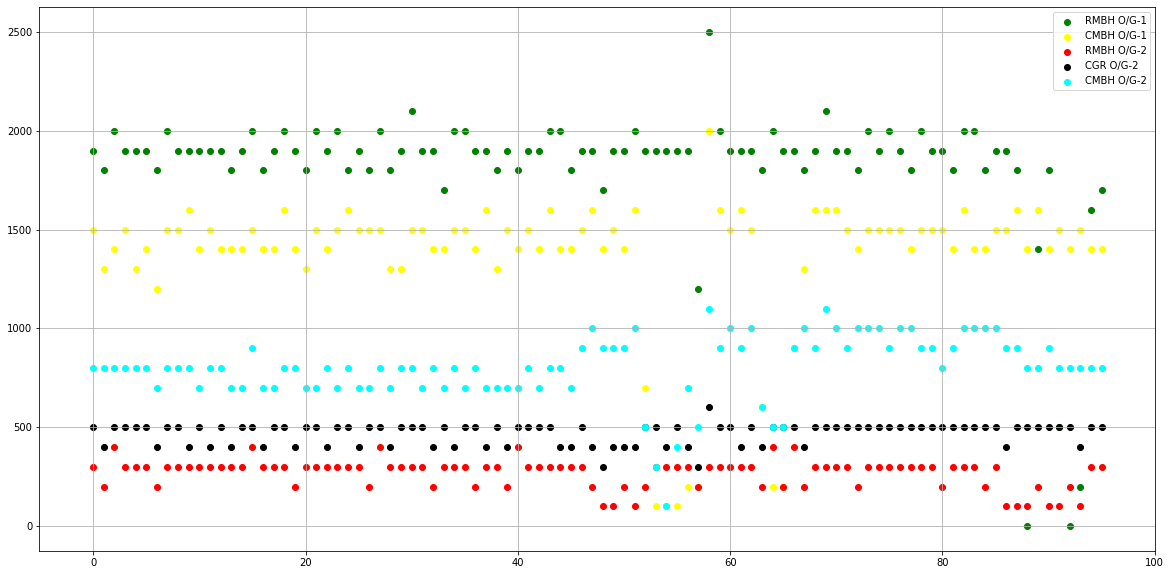

In [48]:
day1 = per_day['energy_per_day1']
day1_df = pd.DataFrame(day1[0])
data1 = day1_df['RMBH O/G-1']
data2 = day1_df['CMBH O/G-1']
data3 = day1_df['RMBH O/G-2']
data4 = day1_df['CGR O/G-2']
data5 = day1_df['CMBH O/G-2']

plt.figure(figsize = (20, 10))
plt.scatter(x = range(0,96), y = data1.to_list(), label = 'RMBH O/G-1',  c = 'green' )
plt.scatter(x = range(0,96), y = data2.to_list(),label = 'CMBH O/G-1' , c = 'yellow' )
plt.scatter(x = range(0,96), y = data3.to_list(), label = 'RMBH O/G-2',  c = 'red' )
plt.scatter(x = range(0,96), y = data4.to_list(),label = 'CGR O/G-2', c = 'black' )
plt.scatter(x = range(0,96), y = data5.to_list(),label = 'CMBH O/G-2',  c = 'cyan' )
plt.legend()
plt.grid()
plt.show()

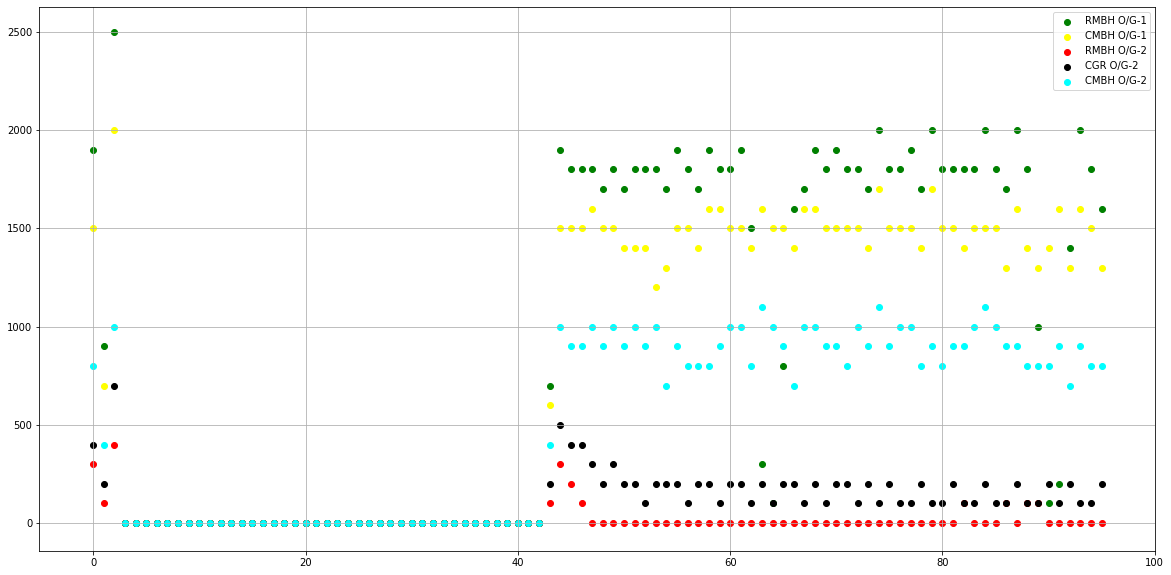

In [49]:
day2 = per_day['energy_per_day2']
day2_df = pd.DataFrame(day2[0])
data1 = day2_df['RMBH O/G-1']
data2 = day2_df['CMBH O/G-1']
data3 = day2_df['RMBH O/G-2']
data4 = day2_df['CGR O/G-2']
data5 = day2_df['CMBH O/G-2']

plt.figure(figsize = (20, 10))
plt.scatter(x = range(0,96), y = data1.to_list(), label = 'RMBH O/G-1',  c = 'green' )
plt.scatter(x = range(0,96), y = data2.to_list(),label = 'CMBH O/G-1' , c = 'yellow' )
plt.scatter(x = range(0,96), y = data3.to_list(), label = 'RMBH O/G-2',  c = 'red' )
plt.scatter(x = range(0,96), y = data4.to_list(),label = 'CGR O/G-2', c = 'black' )
plt.scatter(x = range(0,96), y = data5.to_list(),label = 'CMBH O/G-2',  c = 'cyan' )
plt.legend()
plt.grid()
plt.show()

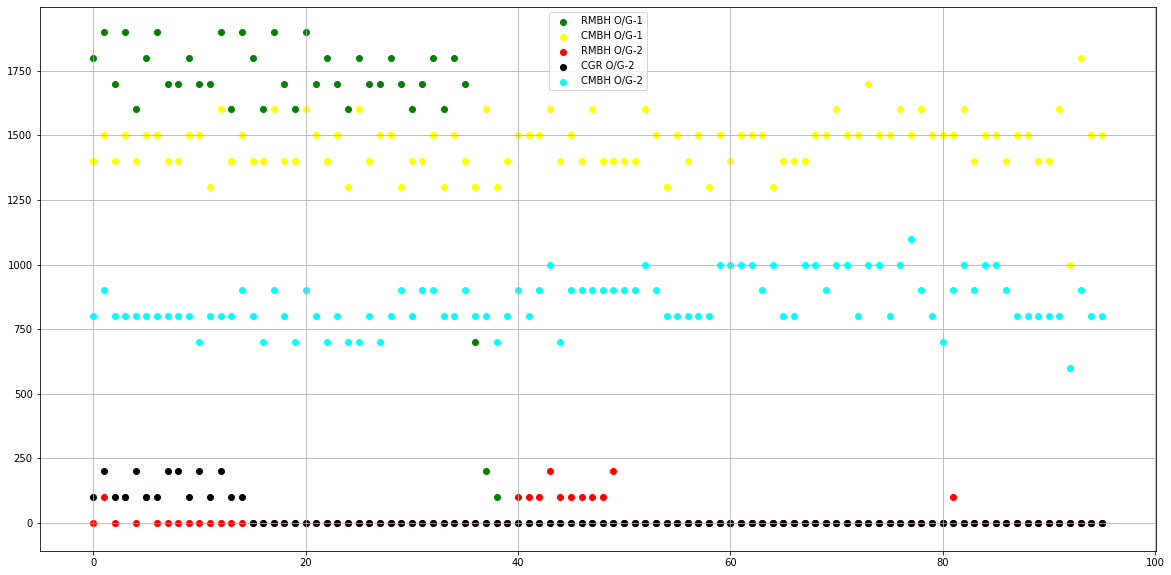

In [50]:
day3 = per_day['energy_per_day3']
day3_df = pd.DataFrame(day3[0])
data1 = day3_df['RMBH O/G-1']
data2 = day3_df['CMBH O/G-1']
data3 = day3_df['RMBH O/G-2']
data4 = day3_df['CGR O/G-2']
data5 = day3_df['CMBH O/G-2']

plt.figure(figsize = (20, 10))
plt.scatter(x = range(0,96), y = data1.to_list(), label = 'RMBH O/G-1',  c = 'green' )
plt.scatter(x = range(0,96), y = data2.to_list(),label = 'CMBH O/G-1' , c = 'yellow' )
plt.scatter(x = range(0,96), y = data3.to_list(), label = 'RMBH O/G-2',  c = 'red' )
plt.scatter(x = range(0,96), y = data4.to_list(),label = 'CGR O/G-2', c = 'black' )
plt.scatter(x = range(0,96), y = data5.to_list(),label = 'CMBH O/G-2',  c = 'cyan' )
plt.legend()
plt.grid()
plt.show()

In [51]:
string = 'Dipti Prakash Palai'
string1 = string.replace(' ', '')
print (string1)
str_list = list(string1)
length = len(str_list)
sums = 0
print (str_list)
for i in range(0, length):
    str_list[i] = i+1
    sums = sums + int(str_list[i])
print (str_list) 
print (sums)
    


DiptiPrakashPalai
['D', 'i', 'p', 't', 'i', 'P', 'r', 'a', 'k', 'a', 's', 'h', 'P', 'a', 'l', 'a', 'i']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
153


In [52]:
dataset.head()

,Log Date / Time,132KV INCOMER,BUS CAPACITOR 1600LVAR,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,BUS CAPACITOR-2 (3300kVAR),RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ]
0,01-04-2019 00:00 - 01-04-2019 00:15,5701.63,0,1899.97,800.00,1499.90,0,300.03,500.0,800.0,5668.86
1,01-04-2019 00:15 - 01-04-2019 00:30,5242.88,0,1800.00,700.03,1300.10,0,200.19,400.0,800.0,5242.88
2,01-04-2019 00:30 - 01-04-2019 00:45,5996.54,0,2000.00,800.00,1399.94,0,399.87,500.0,800.0,5996.54
3,01-04-2019 00:45 - 01-04-2019 01:00,5636.10,0,1900.03,699.90,1500.03,0,300.03,500.0,800.0,5636.10
4,01-04-2019 01:00 - 01-04-2019 01:15,5636.10,0,1899.97,700.03,1299.97,0,300.03,500.0,800.0,5668.86


In [53]:
energy2 = dataset.copy()
energy2['Date'] = energy2['Log Date / Time'].map(lambda x: x.split(' ')[0])
energy2['Time'] = energy2['Log Date / Time'].map(lambda x: x.split(' ')[1])
energy2_prep = energy2.drop(columns = ['Log Date / Time', 'BUS CAPACITOR 1600LVAR', 'BUS CAPACITOR-2 (3300kVAR)'], axis = 1)
energy2_prep

,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date,Time
0,5701.63,1899.97,800.00,1499.90,300.03,500.00,800.00,5668.86,01-04-2019,00:00
1,5242.88,1800.00,700.03,1300.10,200.19,400.00,800.00,5242.88,01-04-2019,00:15
2,5996.54,2000.00,800.00,1399.94,399.87,500.00,800.00,5996.54,01-04-2019,00:30
3,5636.10,1900.03,699.90,1500.03,300.03,500.00,800.00,5636.10,01-04-2019,00:45
4,5636.10,1899.97,700.03,1299.97,300.03,500.00,800.00,5668.86,01-04-2019,01:00
...,...,...,...,...,...,...,...,...,...,...
2778,5799.94,1899.97,800.00,1400.06,300.00,499.97,800.00,5799.94,29-04-2019,22:30
2779,5439.49,1800.00,800.00,1299.97,300.00,500.10,800.00,5439.49,29-04-2019,22:45
2780,5865.47,1800.00,800.00,1400.06,300.00,499.97,999.94,5865.47,29-04-2019,23:00
2781,6291.46,2100.03,899.84,1499.90,400.00,499.97,999.94,6324.22,29-04-2019,23:15


In [54]:
Date1 = energy2_prep.loc[(energy2_prep['Date'] == '01-04-2019'),['Time','132KV INCOMER [ kVAh ]']]
Date1

,Time,132KV INCOMER [ kVAh ]
0,00:00,5668.86
1,00:15,5242.88
2,00:30,5996.54
3,00:45,5636.10
4,01:00,5668.86
...,...,...
91,22:45,4128.77
92,23:00,3735.55
93,23:15,3833.86
94,23:30,5341.18


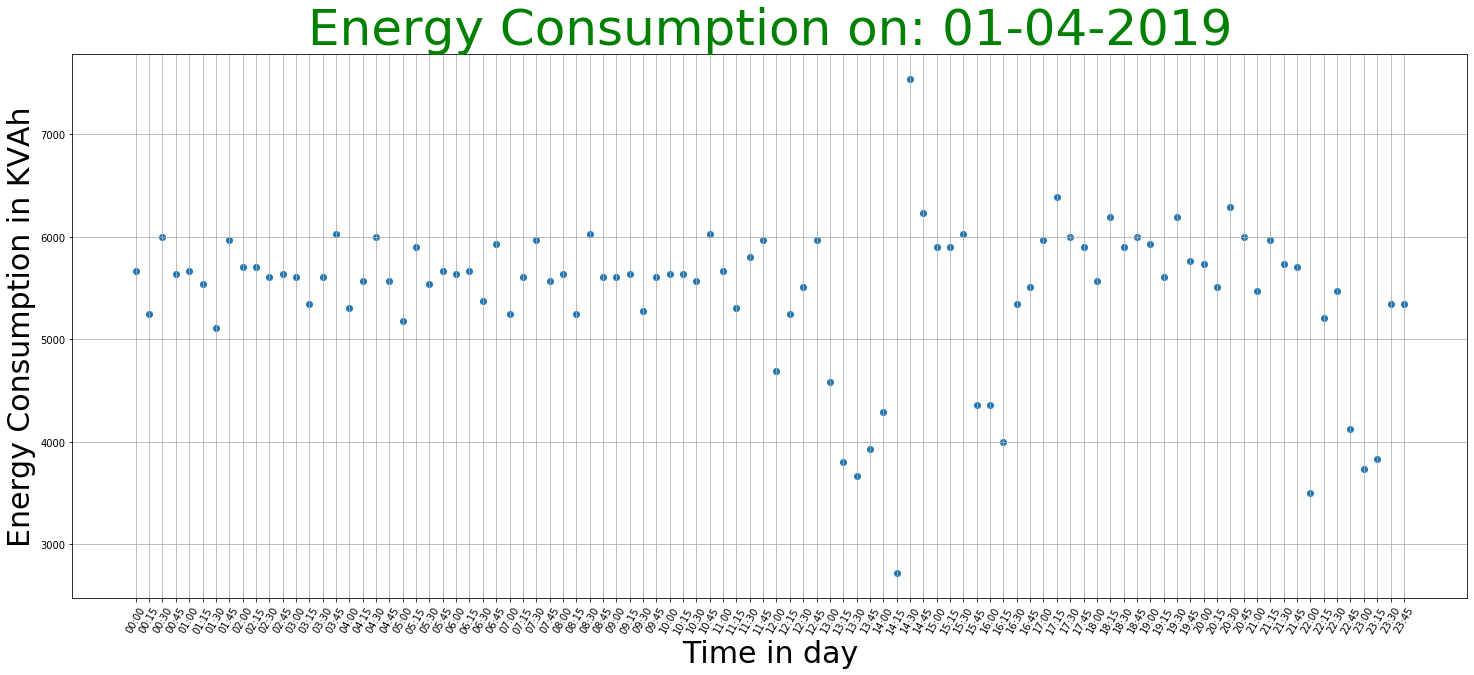

In [55]:
def DayWise(day):
    Date1 = energy2_prep.loc[(energy2_prep['Date'] == day),['Time','132KV INCOMER [ kVAh ]']]
    plt.figure(figsize = [25, 10])
    plt.scatter(Date1['Time'], Date1['132KV INCOMER [ kVAh ]'])
    title = 'Energy Consumption on:'+ ' ' + day
    plt.title(title , fontsize = 50, c = 'green')
    plt.xlabel('Time in day', fontsize = 30)
    plt.ylabel('Energy Consumption in KVAh', fontsize = 30)
    plt.xticks(rotation = 60)
    plt.grid()
    plt.savefig('Energy Consumption on 1st April 2019.pdf')
    plt.show()
DayWise('01-04-2019')

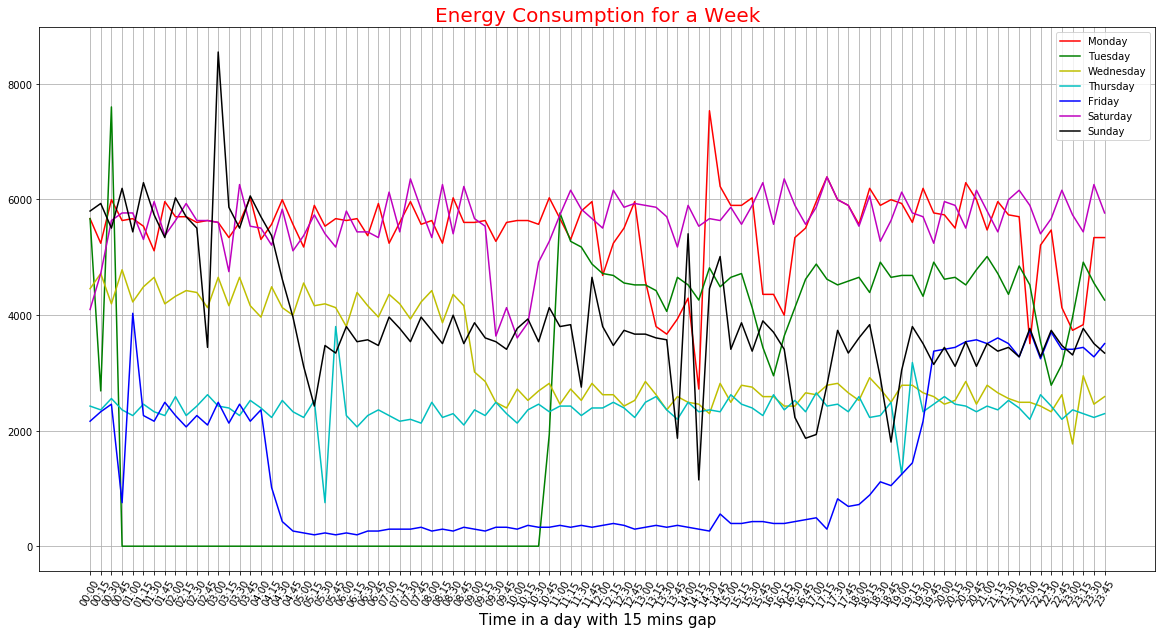

In [56]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_days = energy2_prep['Date'].unique()[0:7]
color = ['r', 'g', 'y', 'c', 'b', 'm', 'k']
plt.figure(figsize= (20,10))
for day, wk, clr in zip(week_days, week, color):
    X = energy2_prep.loc[(energy2_prep['Date'] == day), ['Time']]
    Y = energy2_prep.loc[(energy2_prep['Date'] == day),['132KV INCOMER [ kVAh ]']]
    plt.plot(X.iloc[:, 0].to_list() , Y.iloc[:, 0].to_list(), label = wk, color = clr  )
plt.xticks(rotation = 60)
plt.title('Energy Consumption for a Week', fontsize = 20, color = 'r' )
plt.xlabel('Time in a day with 15 mins gap', fontsize = 15)
plt.legend()
plt.grid()
plt.savefig('Energy Consumption for a week.pdf')
plt.show()        

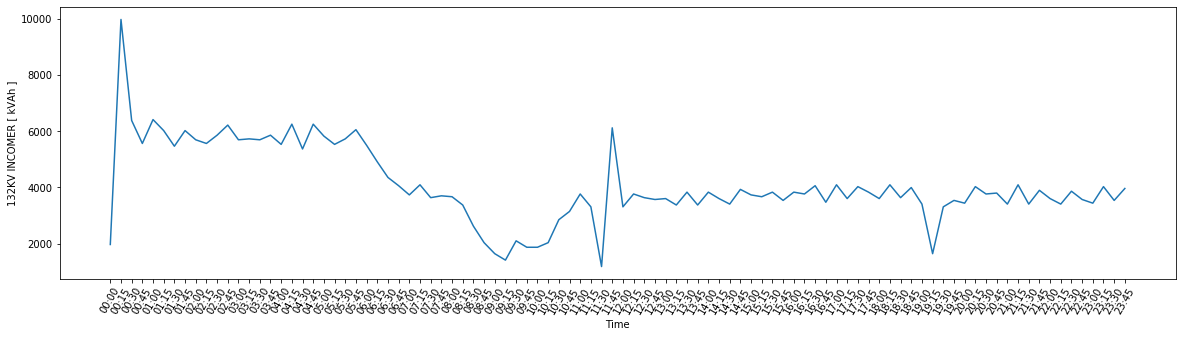

In [57]:
import seaborn as sns
def energyPerDay_Lineplot(date): 
    energy_day = energy2_prep[energy2_prep['Date'] == date]
    plt.figure(figsize = (20,5))
    sns.lineplot(x = 'Time', y = '132KV INCOMER [ kVAh ]', data = energy_day)
    plt.xticks(rotation = 60)
    plt.show()
energyPerDay_Lineplot('10-04-2019')

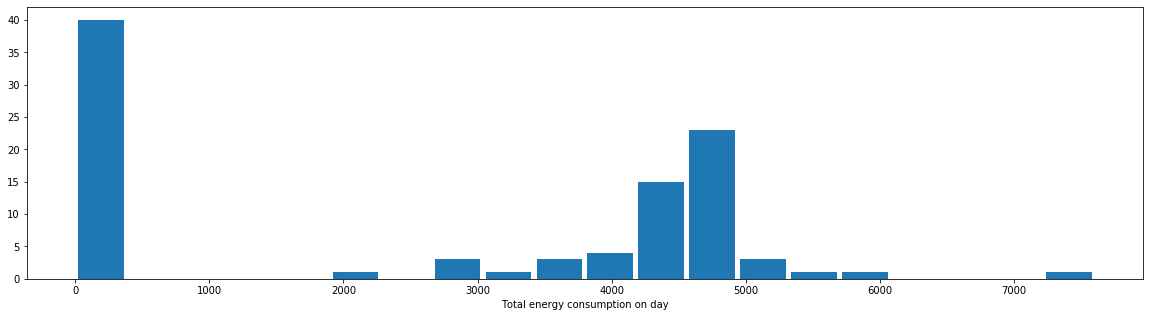

In [58]:
def energy_per_day(date): 
    energy_day = energy2_prep.loc[(energy2_prep['Date'] == date), ['132KV INCOMER [ kVAh ]']]
    plt.figure(figsize = (20,5))
    plt.hist(energy_day.iloc[:,0].to_list(), bins = 20, rwidth = 0.9)
    plt.xlabel('Total energy consumption on day', fontsize = 10)
    plt.show()
energy_per_day('02-04-2019')

In [59]:
import ipywidgets as widgets
from IPython.display import display
widgets.IntSlider(min=0, max=10, step=1, description='Slider:', value=3)
slider = widgets.IntSlider()
display(slider)

IntSlider(value=0)

In [60]:
import ipywidgets as widgets
from IPython.display import display

dropdown_date = widgets.Dropdown(options = energy2_prep.Date.tolist())

def DayWise(day):
    Date1 = energy2_prep.loc[(energy2_prep['Date'] == day),['Time','132KV INCOMER [ kVAh ]']]
    plt.figure(figsize = [25, 10])
    plt.scatter(Date1['Time'], Date1['132KV INCOMER [ kVAh ]'])
    title = 'Total Energy Consumption on:'+ ' ' + day
    plt.title(title , fontsize = 50, c = 'green')
    plt.xlabel('Time in day', fontsize = 30)
    plt.ylabel('Energy Consumption in KVAh', fontsize = 30)
    plt.xticks(rotation = 60)
    plt.grid()
    plt.show()

dropdown_date.observe(DayWise, names='value')

In [61]:
import ipywidgets as widgets
from IPython.display import display

dropdown_date = widgets.Dropdown(options = energy2_prep.Date.unique().tolist())
def EachDay(date):
    display(energy2_prep[energy2_prep['Date'] == date])
dropdown_date.observe(EachDay, names = 'value')
display(dropdown_date)

Dropdown(options=('01-04-2019', '02-04-2019', '03-04-2019', '04-04-2019', '05-04-2019', '06-04-2019', '07-04-2…

In [62]:
def EachDay(date):
    display(energy2_prep[energy2_prep['Date'] == date])
EachDay('02-04-2019')

,132KV INCOMER,RMBH O/G-1,CCR O/G-1,CMBH O/G-1,RMBH O/G-2,CGR O/G-2,CMBH O/G-2,132KV INCOMER [ kVAh ],Date,Time
96,5636.10,1899.97,699.90,1500.03,300.03,400.0,800.00,5668.86,02-04-2019,00:00
97,2719.74,900.03,300.03,699.90,100.10,200.0,400.00,2686.98,02-04-2019,00:15
98,7569.41,2499.97,1000.06,2000.00,399.87,700.0,1000.00,7602.18,02-04-2019,00:30
99,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,02-04-2019,00:45
100,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,02-04-2019,01:00
...,...,...,...,...,...,...,...,...,...,...
187,3112.96,200.00,199.94,1600.00,0.00,100.0,900.03,3145.73,02-04-2019,22:45
188,3964.93,1400.00,200.06,1299.97,0.00,200.0,699.97,3964.93,02-04-2019,23:00
189,4915.20,2000.00,199.94,1600.00,0.00,100.0,900.03,4915.20,02-04-2019,23:15
190,4554.75,1800.00,300.03,1500.03,0.00,100.0,800.00,4554.75,02-04-2019,23:30


In [63]:
# Let's check consumption in each day of a week to find out which day has more consumption than others
# 01-04-2019 is Monday so 02-04-2019 is Tuesday and so on...
avg_day = []
Date = energy2_prep['Date'].unique().tolist()
for dt in Date:
    energy_day = energy2_prep.loc[(energy2_prep['Date'] == dt), ['132KV INCOMER [ kVAh ]']]
    mean = round(energy_day.values.mean())
    avg_day.append(mean)
avg_day_for_week = avg_day[0:7]
avg_day_for_week

[5458.0, 2610.0, 3231.0, 2367.0, 1313.0, 5611.0, 3914.0]

In [64]:
avg_day_for_week2 = avg_day[7:14]
avg_day_for_week3 = avg_day[14:21]
avg_day_for_week4 = avg_day[21:28]

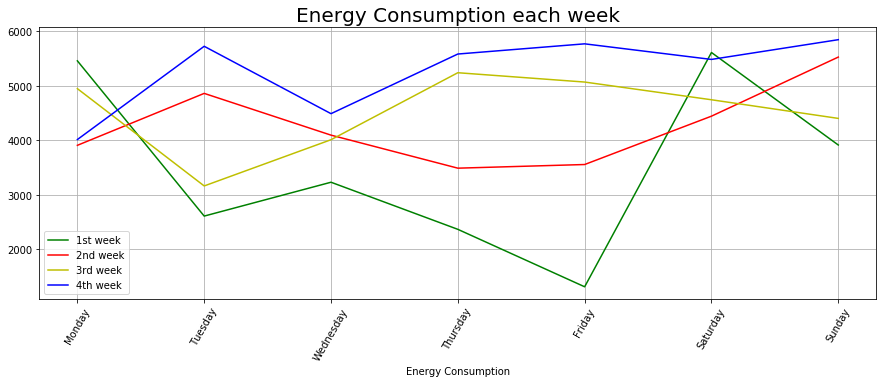

In [65]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,5))
plt.plot(week, avg_day_for_week, label = '1st week', color = 'g')
plt.plot(week, avg_day_for_week2, label = '2nd week', color = 'r')
plt.plot(week, avg_day_for_week3, label = '3rd week', color = 'y')
plt.plot(week, avg_day_for_week4, label = '4th week', color = 'b')
plt.xticks(rotation = 60)
plt.title('Energy Consumption each week', fontsize = 20)
plt.xlabel('Energy Consumption')
plt.legend()
plt.grid()
plt.savefig('Energy Consumption each week.pdf')
plt.show()
